# Grape Disease Detection with CNN

<b>Artırılmış Asma Hastalığı Veri Kümesi</b><br>
Black Rot, ESCA, Leaf Blight veya Healthy içeren 12.000 üzüm bitkisi resmi içerir
<br>
Kullanılanresimç türleri aşağıdaki gibidir
* Black Rot
* ESCA
* Leaf Blight
* Healthyg

Bu projede kullanılan veri setine [buradan](https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset) erişilebilir

![](https://storage.googleapis.com/kaggle-datasets-images/2869270/4948090/b7952553bc195407f9cc99f21fae1d14/dataset-cover.png?t=2023-02-05-01-39-40)

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
img_path="Final Training Data/"
labels = ["Black Rot", "ESCA", "Leaf Blight", "Healthy"]

In [3]:
img_list=[]
label_list=[]
for label in labels:
    i=0
    for img_file in os.listdir(img_path+label):
        i+=1
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({"img":img_list, "label":label_list})

In [5]:
df["label"].value_counts()

label
Black Rot      3000
ESCA           3000
Leaf Blight    3000
Healthy        3000
Name: count, dtype: int64

In [6]:
df.sample(10)

,img,label
2584,Final Training Data/Black Rot/_328_6160291.png,Black Rot
9893,Final Training Data/Healthy/868c8ecd-f7dc-41c4...,Healthy
1690,Final Training Data/Black Rot/_1012_7433713.png,Black Rot
3272,Final Training Data/ESCA/29aa9647-37c9-4f10-8a...,ESCA
4377,Final Training Data/ESCA/c1d4a89c-d1b9-4363-9b...,ESCA
6719,Final Training Data/Leaf Blight/697a3bd4-f0be-...,Leaf Blight
6132,Final Training Data/Leaf Blight/14ba628c-fdec-...,Leaf Blight
4052,Final Training Data/ESCA/9b23bab7-3070-455c-8f...,ESCA
6874,Final Training Data/Leaf Blight/7977db8d-2b6f-...,Leaf Blight
4273,Final Training Data/ESCA/b7411218-8f11-487e-ac...,ESCA


In [7]:
d={"Black Rot":0, "ESCA":1, "Leaf Blight":2, "Healthy":3}

In [8]:
df["encode_label"]= df["label"].map(d)

In [9]:
df.sample(10)

,img,label,encode_label
11911,Final Training Data/Healthy/_814_5371255.png,Healthy,3
2711,Final Training Data/Black Rot/_426_9246190.png,Black Rot,0
862,Final Training Data/Black Rot/7a7e0600-62cb-4c...,Black Rot,0
8007,Final Training Data/Leaf Blight/_1505_424844.png,Leaf Blight,2
383,Final Training Data/Black Rot/366a6137-fac0-4f...,Black Rot,0
4146,Final Training Data/ESCA/a7ec5e11-7c67-4802-bb...,ESCA,1
6123,Final Training Data/Leaf Blight/1350ee76-d3e0-...,Leaf Blight,2
4625,Final Training Data/ESCA/dd0daa1c-d6cb-418c-87...,ESCA,1
5535,Final Training Data/ESCA/_381_7267690.png,ESCA,1
1434,Final Training Data/Black Rot/bedd096d-7b67-4d...,Black Rot,0


In [10]:
df["img"][0]

'Final Training Data/Black Rot/00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376_flipLR.JPG'

In [11]:
yaprak=cv2.imread(str(df["img"][0]))
yaprak.shape

(256, 256, 3)

In [12]:
x=[]
for img in df["img"]:
    img=cv2.imread(str(img))
    img=cv2.resize(img, (64,64))
    img=img/255.0 
    x.append(img)

In [13]:
x=np.array(x)

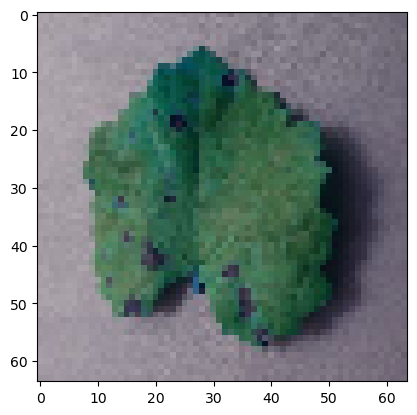

In [14]:
plt.imshow(x[0])

In [15]:
y=df['encode_label']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## Modelleme

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [18]:
model=Sequential()
model.add(Input(shape=(64,64,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10, verbose=1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6638 - loss: 0.9183 - val_accuracy: 0.8842 - val_loss: 0.3086
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8923 - loss: 0.2772 - val_accuracy: 0.9196 - val_loss: 0.2164
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9249 - loss: 0.1959 - val_accuracy: 0.9433 - val_loss: 0.1512
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9503 - loss: 0.1329 - val_accuracy: 0.9571 - val_loss: 0.1178
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9756 - loss: 0.0729 - val_accuracy: 0.9517 - val_loss: 0.1296
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9722 - loss: 0.0735 - val_accuracy: 0.9754 - val_loss: 0.0762
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9567 - val_loss: 0.1067
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9812 - loss: 0.0547 - val_accuracy: 0

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - loss: 0.0997


In [21]:
accuracy

0.9670833349227905

In [22]:
import matplotlib.pyplot as plt

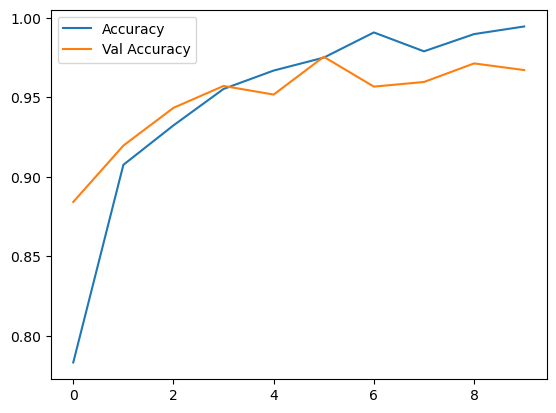

In [23]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [24]:
pred = model.predict(x_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [26]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[589,  12,  10,   1],
       [ 26, 592,   6,   0],
       [  5,   0, 563,   0],
       [  1,   0,  18, 577]], dtype=int64)

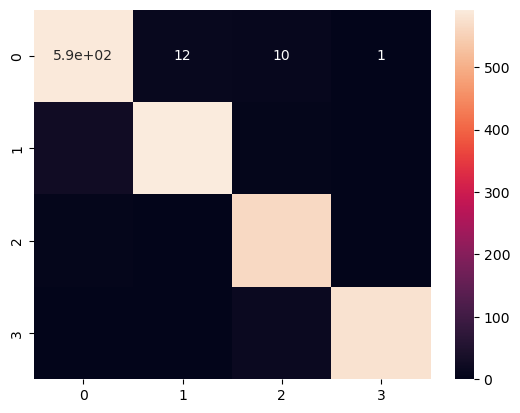

In [27]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [28]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       612
           1       0.98      0.95      0.96       624
           2       0.94      0.99      0.97       568
           3       1.00      0.97      0.98       596

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



In [29]:
model.save('grape_Disease_model.h5')

In [82]:
yaprak=cv2.imread("c.jpg")
yaprak.shape

(607, 810, 3)

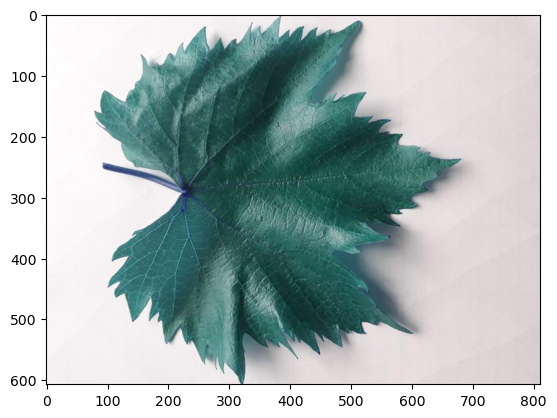

In [83]:
plt.imshow(yaprak)

In [84]:
yaprak=cv2.resize(yaprak, (64,64))
yaprak=yaprak/255.0

In [85]:
yaprak=np.array(yaprak)

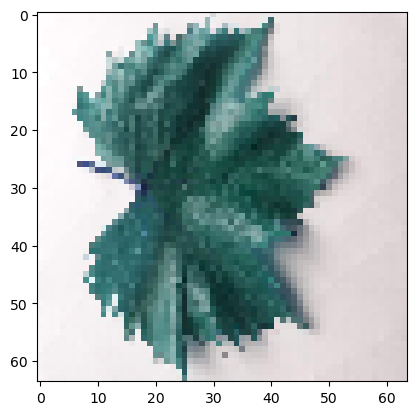

In [86]:
plt.imshow(yaprak)

In [87]:
yaprak=np.expand_dims(yaprak, axis=0)

In [88]:
t=model.predict(yaprak)
t

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[6.9335393e-08, 7.2372891e-10, 9.9999988e-01, 3.6364385e-14]],
      dtype=float32)

In [89]:
np.argmax(t)

2

## Sonuç

Bu projede üzüm yapraklarındaki hastalıkları belirleyen bir derin öğrenme modeli geliştirilmiştir.